# 머신러닝
    예측 / 분류 / 군집
    지도학습(정답)    /  비지도학습(정답이 없음)
    회귀분석 - 예측          군집
    분류    

### 머신러닝 프로세스
    데이터 정리(전처리) - 데이터 분리(훈련용 / 검증) - 알고리즘 준비(머신러닝 선택) 
    - 학습(훈련데이터)  - 예측(검증 데이터) - 평가 - 모델 활용

In [1]:
# y = ax + 1
# x= ........
# y ........
# y = ax2 + bx + cx +d

In [2]:
# 단순회귀 : 두 변수 사이의 일대일로 대응되는 확률적,통계적 상관성을 찾는 알고리즘

# 1. 데이터 정리(전처리)

In [4]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [8]:
url = 'https://raw.githubusercontent.com/leekyuyoung20221226/python/main/data/auto-mpg.csv'
colnames = ['mpg','cylinders','displacement'
            ,'hourepower','weight','acceleration','model year','origin','name']
df = pd.read_csv(url,header=None, names=colnames)
df.head()

,mpg,cylinders,displacement,hourepower,weight,acceleration,model year,origin,name
0,18.0,8,307.0,130.0,3504.0,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693.0,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436.0,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433.0,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449.0,10.5,70,1,ford torino


In [10]:
print(df.info())
print('-----------------')
print(df.describe())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   hourepower    398 non-null    object 
 4   weight        398 non-null    float64
 5   acceleration  398 non-null    float64
 6   model year    398 non-null    int64  
 7   origin        398 non-null    int64  
 8   name          398 non-null    object 
dtypes: float64(4), int64(3), object(2)
memory usage: 28.1+ KB
None
-----------------
              mpg   cylinders  displacement       weight  acceleration  \
count  398.000000  398.000000    398.000000   398.000000    398.000000   
mean    23.514573    5.454774    193.425879  2970.424623     15.568090   
std      7.815984    1.701004    104.269838   846.841774      2.757689   
min      9.000000    3.000000     68.0000

In [11]:
df['hourepower'].unique()

array(['130.0', '165.0', '150.0', '140.0', '198.0', '220.0', '215.0',
       '225.0', '190.0', '170.0', '160.0', '95.00', '97.00', '85.00',
       '88.00', '46.00', '87.00', '90.00', '113.0', '200.0', '210.0',
       '193.0', '?', '100.0', '105.0', '175.0', '153.0', '180.0', '110.0',
       '72.00', '86.00', '70.00', '76.00', '65.00', '69.00', '60.00',
       '80.00', '54.00', '208.0', '155.0', '112.0', '92.00', '145.0',
       '137.0', '158.0', '167.0', '94.00', '107.0', '230.0', '49.00',
       '75.00', '91.00', '122.0', '67.00', '83.00', '78.00', '52.00',
       '61.00', '93.00', '148.0', '129.0', '96.00', '71.00', '98.00',
       '115.0', '53.00', '81.00', '79.00', '120.0', '152.0', '102.0',
       '108.0', '68.00', '58.00', '149.0', '89.00', '63.00', '48.00',
       '66.00', '139.0', '103.0', '125.0', '133.0', '138.0', '135.0',
       '142.0', '77.00', '62.00', '132.0', '84.00', '64.00', '74.00',
       '116.0', '82.00'], dtype=object)

In [13]:
df['hourepower'].replace('?', np.nan,inplace=True)

In [14]:
df.dropna(subset=['hourepower'], axis=0, inplace=True)

In [17]:
df['hourepower'] = df['hourepower'].astype('float')

In [18]:
df.describe()

,mpg,cylinders,displacement,hourepower,weight,acceleration,model year,origin
count,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000
mean,23.445918,5.471939,194.411990,104.469388,2977.584184,15.541327,75.979592,1.576531
std,7.805007,1.705783,104.644004,38.491160,849.402560,2.758864,3.683737,0.805518
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000,1.000000
25%,17.000000,4.000000,105.000000,75.000000,2225.250000,13.775000,73.000000,1.000000
50%,22.750000,4.000000,151.000000,93.500000,2803.500000,15.500000,76.000000,1.000000
75%,29.000000,8.000000,275.750000,126.000000,3614.750000,17.025000,79.000000,2.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000,3.000000


### 필요한 종속변수(속성) 선택

In [19]:
df2 = df[['mpg','cylinders','hourepower','weight']]
df2.head()

,mpg,cylinders,hourepower,weight
0,18.0,8,130.0,3504.0
1,15.0,8,165.0,3693.0
2,18.0,8,150.0,3436.0
3,16.0,8,150.0,3433.0
4,17.0,8,140.0,3449.0


### 선형관계확인 - 종속변수와 독릭변수간의 일대일 관계 - 직선의 그래프 형태

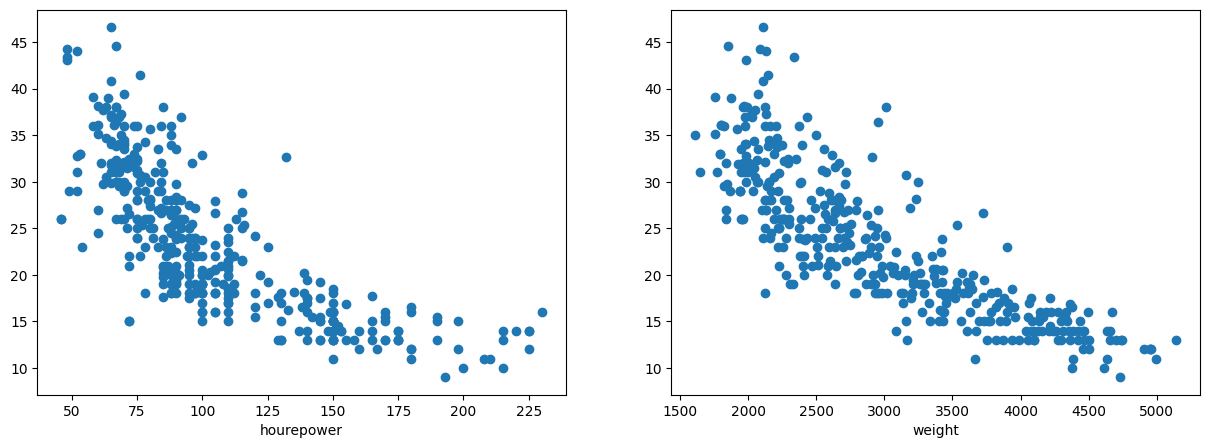

In [30]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.scatter(data=df2,x='hourepower',y='mpg')
plt.xlabel('hourepower')

plt.subplot(1,2,2)
plt.scatter(data=df2,x='weight',y='mpg')
plt.xlabel('weight')
plt.show()

### seaboarn regplot  회귀선을 포함한 plot

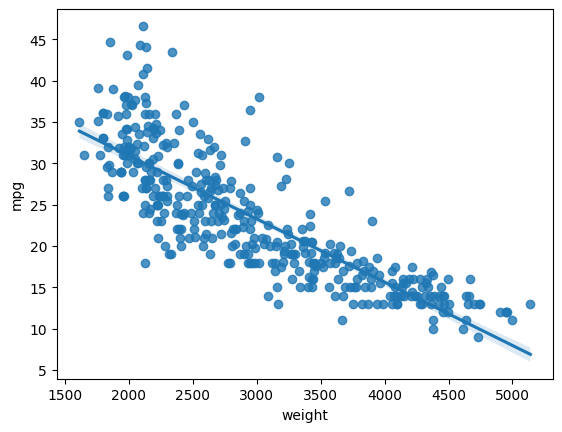

In [31]:
sns.regplot(x='weight',y='mpg', data= df2)
plt.show()

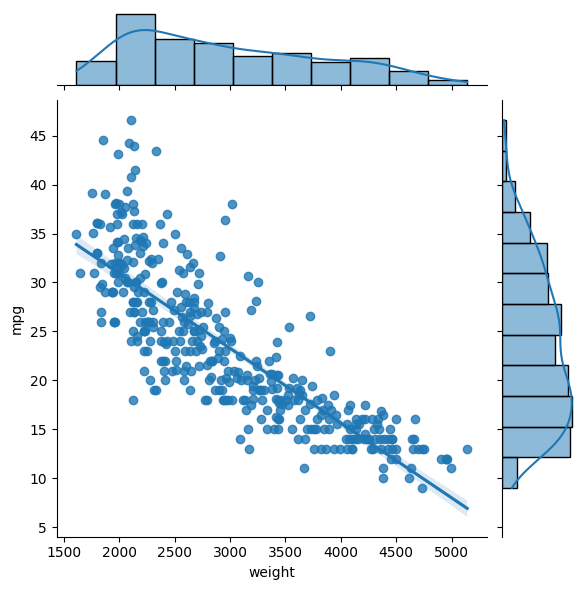

In [34]:
sns.jointplot(x='weight',y='mpg', data= df2, kind='reg')
plt.show()

In [35]:
df2.head()

,mpg,cylinders,hourepower,weight
0,18.0,8,130.0,3504.0
1,15.0,8,165.0,3693.0
2,18.0,8,150.0,3436.0
3,16.0,8,150.0,3433.0
4,17.0,8,140.0,3449.0


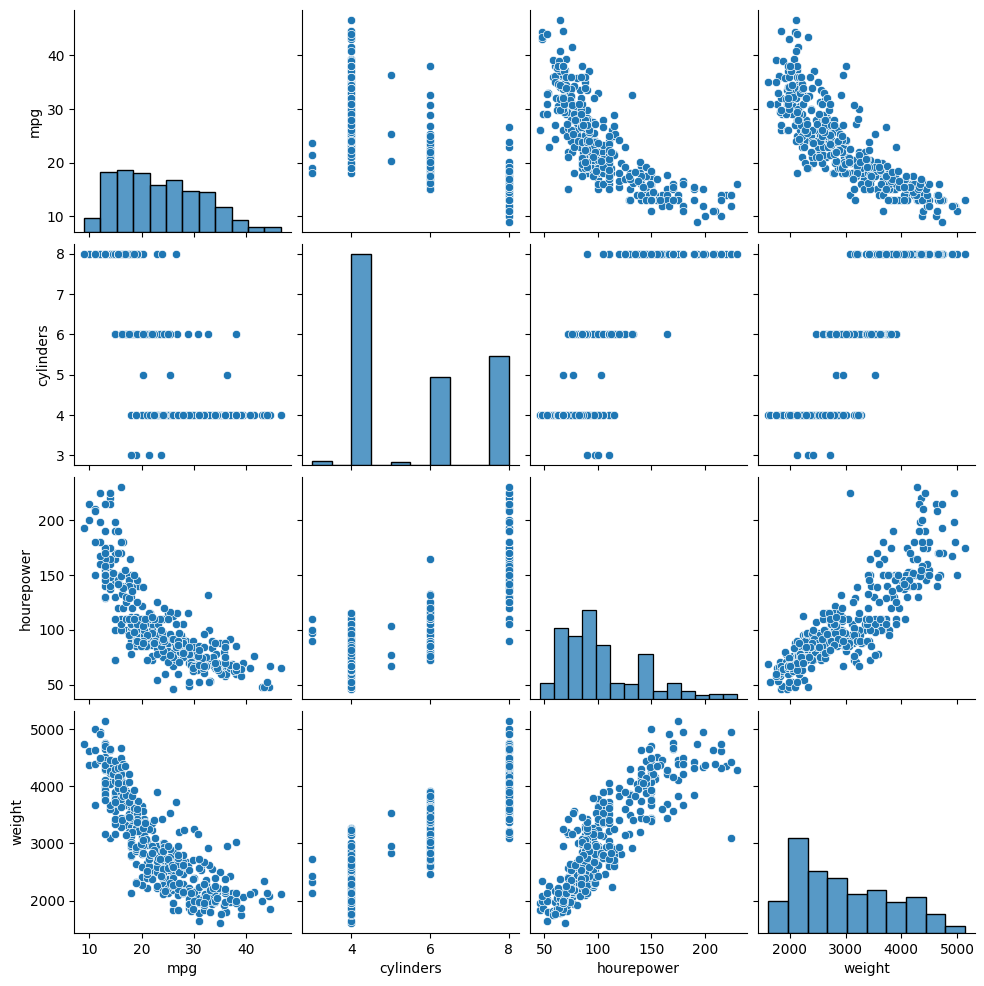

In [36]:
sns.pairplot(df2)
plt.show()

# 2. 데이터 분리(훈련용 / 검증)

In [60]:
# 종속변수 mpg  독립변수는 weight, hoursepower 상관관계 가 있음을 확인
# weight를 선택해서 학습
x = df2[['weight']]
y = df2[['mpg']]
from sklearn.model_selection import train_test_split

In [61]:
x_train,x_test,y_train,y_test =  train_test_split(x,y,random_state=0)

In [62]:
len(df2), len(x_train),len(x_test)

(392, 294, 98)

In [63]:
len(x_train),len(y_train),len(x_test),len(y_test)

(294, 294, 98, 98)

# 3.  알고리즘 준비(머신러닝 선택) - 단순선형(단항회귀분석)

In [64]:
# 회귀(예측) regression
from sklearn.linear_model import LinearRegression  # 클래스
lr =  LinearRegression()  # 단순선형회귀 클래스의 객체 생성

#  4.학습(훈련용) - fit

In [66]:
# 2D 형태를 요구함
print(x_train.shape)
lr.fit(x_train,y_train)

(294, 1)


LinearRegression()

In [68]:
# 선형회귀는 y = ax+b의 수식을 정하는 과정
print('기울기 a : ',lr.coef_)
print('절편 b : ',lr.intercept_)

기울기 a :  [[-0.00773281]]
절편 b :  [46.41177487]


# 5. 예측(검증 데이터)

In [84]:
print(x_test.values[0],lr.predict(x_test)[0], y_test.values[0])
print(lr.coef_[0][0]*x_test.values[0]+lr.intercept_[0])

[2125.] [29.97955598] [28.]
[29.97955598]


# 6. 평가 - 결정계수(R-제곱)

In [78]:
lr.score(x_test,y_test)

0.6585040033216103

### 모델의 성능 시각화 - 모델을 학습한후 검증용으로 예측한 값과 실제값이 어느정도 차이를 보이는지

In [86]:
y_hat = lr.predict(x)

C:\Users\user\AppData\Local\Temp\ipykernel_1776\3555798509.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y,hist=False,label='y')
C:\Users\user\AppData\Local\Temp\ipykernel_1776\3555798509.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_hat, hist=False,label='y_hat')

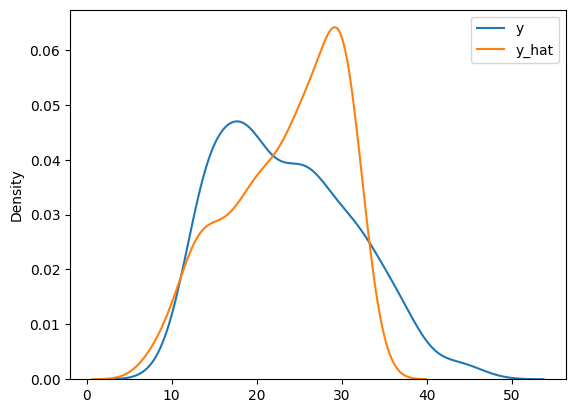

In [93]:
sns.distplot(y,hist=False,label='y')
sns.distplot(y_hat, hist=False,label='y_hat')
plt.legend()
plt.show()

In [94]:
# 실제데이터는 왼쪽으로 쏠려있고. 머신러닝이 예측한 모델은 오른쪽으로 쏠려있다... -- 오차가 좀 잇다......
# 오차를 좀더 줄여야 함.... 즉 직선의 방정식으로는 한계가 있다는 것이 시각화를 통해 이미 드러났고.. 
# 이걸 단순선형 머신러닝으로 학습했을때 위와 같은 결과를 도래 했다..
# 결론.. 단순선형은 부적합

# 다항 회귀분석 - 2차원 이상
    y = ax2 + bx + c